Irsath Azeez<br>
## Data Analysis Workshop

Importing the library to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


read the csv (comma seprated file) from the computer

In [2]:
file = pd.read_csv('/Users/irsathazeez/Desktop/Amazon Sale Report.csv')

copying the file to file2

In [3]:
rawFile = file.copy()

interacting the operating system using this jupyter notebook, here we are trying to see the file size using bash language

In [4]:
! du -h '/Users/irsathazeez/Desktop/Amazon Sale Report.csv' | awk '{print $1}'

18M



<div style="text-align:center; "><img src='/Users/irsathazeez/Desktop/qu.jpeg'></img></div>

# <span style= "color:brown;"><b>Questions raised by the customer regarding Amazon sales data from March to June 2022: </span><br>

01. What is the total sales amount over the past 3 months, and what are the individual sales figures for each month?
02. Which items have been sold the most?
03. What are the most popular sizes sold for each item?
04. Which state recorded the highest sales?
05. Which month experienced the peak sales season?

display how many rows and columns in the file

In [5]:
file.shape

(128976, 21)

Viewing few rows from the Sales data

In [6]:
file.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


display the file information. This provides the information about the datatypes of columns

In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

display the description of the file. this will provide the statistic of the file

In [13]:
file.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


save the file column names into a variable

In [14]:
columns = file.columns
print(columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


Checking if there is any null values in the data set

In [15]:
file.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [16]:
columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

Dropping the columns that all values are null

In [17]:
f1 = file.drop([columns[-1],columns[-2]], axis = 1)

In [18]:
f1.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [19]:
columns = list(columns)
columns

['index',
 'Order ID',
 'Date',
 'Status',
 'Fulfilment',
 'Sales Channel',
 'ship-service-level',
 'Category',
 'Size',
 'Courier Status',
 'Qty',
 'currency',
 'Amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'B2B',
 'fulfilled-by',
 'New',
 'PendingS']

Filter rows where the 'currency' column is not null

In [20]:
f1 = f1[file['currency'].notnull()]

In [21]:
f1.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
B2B                       0
fulfilled-by          83649
dtype: int64

In [22]:
city_columns = file.columns[-8:-4]

In [23]:
city_columns

Index(['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], dtype='object')

filling all the null values to 'unknown' without deleting them

In [24]:
f1.fillna('unknown',inplace=True)

In [25]:
f1.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [26]:
f1.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,unknown
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,unknown


In [27]:
f1.reset_index(drop=True,inplace=True)

In [28]:
f1.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,unknown
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,unknown


## Now going to see if there are any duplicate records

The reason why we are removing the leading space and any extra space within is,<br>
<p style="color:red"><b>'&nbsphello world' != 'hello  world&nbsp' != 'hello&nbsp&nbsp&nbspworld'</b></p>

In [29]:
for col  in f1.columns[1:]:
    if type(f1[col].loc[0]) == 'str':
        f1[col] = f1[col].str.strip().replace(r'\s+', ' ', regex=True) # removing leading space on both side and replacing multiple space with single space
        # f1[col] = f1[col].str # removing extra space within a string

In [30]:
f1.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


In [31]:
print('file index column is unique =', f1['index'].is_unique)
print('file index is unique = ',f1.index.is_unique)
print('file index and file index columns are same = ', list(f1['index'].values) == list(f1.index))

file index column is unique = False
file index is unique =  True
file index and file index columns are same =  False


In [32]:
for i,j in zip(f1.index, f1['index'].values):
    if(i != j):
        print(i,j)
        break
# type(file['index'][0])

8 9


In [33]:
f1.head(11)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,unknown
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,unknown
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,unknown
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,unknown
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
8,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,unknown
9,10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.00,CHENNAI,TAMIL NADU,600073.0,IN,False,unknown


removing the index column recorded by user

In [34]:
f1.drop('index', inplace=True, axis = 1)

make the index starting from 1

In [35]:
f1.index = f1.index + 1

1. Numerical columns: Missing or null values are represented as NaN (using numpy.NaN).<br>
2. Datetime columns: Missing values are often represented as NaT (Not a Time).<br>
3. String or other object columns: Missing values are represented as None or pandas.NA.


In [36]:
f1.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
2,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,unknown
4,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
5,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,unknown


In [37]:
f1.duplicated().sum()

722

Now checking if there are any duplicate records

In [38]:
duplicates = f1[f1.duplicated()]
duplicates

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
158,407-3742007-3242711,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500086.0,IN,False,unknown
192,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,unknown
193,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
194,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False,unknown
195,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119899,404-0476106-9221156,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,355.0,KURNOOL,ANDHRA PRADESH,518002.0,IN,False,Easy Ship
120329,171-7173124-7979515,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,L,Shipped,1,INR,735.0,PUNE,MAHARASHTRA,411057.0,IN,False,Easy Ship
120610,407-3748395-2933152,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,1,INR,399.0,BENGALURU,KARNATAKA,560037.0,IN,False,unknown
120725,406-7346635-7865146,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,292.0,BENGALURU,KARNATAKA,560078.0,IN,False,unknown


The iloc[] and loc[] are two different way. loc focus on actual index and iloc focus on from index 0-... 

In [39]:
duplicates.loc[158,:].to_frame().T

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
158,407-3742007-3242711,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500086.0,IN,False,unknown


this code to show you the duplicate records of a record from duplicates

In [40]:
for i in f1.index:
    if f1.loc[i,:].equals(duplicates.loc[158,:]):
        print(i)
    

157
158


Showing the duplicate entries

In [41]:
f1.loc[[157,158],:]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
157,407-3742007-3242711,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500086.0,IN,False,unknown
158,407-3742007-3242711,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500086.0,IN,False,unknown


In [42]:
f1.shape

(121176, 18)

Dropping the duplicated records

In [43]:
f1.drop_duplicates(inplace=True)

In [44]:
f1.shape

(120454, 18)

In [45]:
samples = f1[f1['Amount'] == 0]   # could be a sample items sent to customer
samples

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
203,408-4547464-4180323,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XXL,Shipped,1,INR,0.0,BHUBANESWAR,ODISHA,752054.0,IN,False,Easy Ship
358,408-5020509-5674715,04-30-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,0.0,NEW DELHI,DELHI,110096.0,IN,False,Easy Ship
368,408-3137526-3167563,04-30-22,Shipped,Amazon,Amazon.in,Standard,Shirt,L,Shipped,1,INR,0.0,DARJEELING,WEST BENGAL,734101.0,IN,False,unknown
371,408-7971979-8745937,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XS,Shipped,1,INR,0.0,LUDHIANA,PUNJAB,141001.0,IN,False,Easy Ship
375,408-0912805-7526753,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,0.0,MUMBAI,MAHARASHTRA,400101.0,IN,False,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120777,408-6490796-0249925,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,0.0,CHENNAI,TAMIL NADU,600073.0,IN,False,unknown
120836,408-9074023-7691550,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Socks,M,Shipped,1,INR,0.0,INDORE,MADHYA PRADESH,452016.0,IN,False,Easy Ship
120905,408-9473849-4953122,06-01-2022,Shipped,Amazon,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,0.0,MOHALI,PUNJAB,140301.0,IN,False,unknown
121017,408-9579839-6574765,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XL,Shipped,1,INR,0.0,VADAKARA,KERALA,673101.0,IN,False,Easy Ship


Removing the records that the amount was 0

In [46]:
f1 = f1[f1['Amount'] != 0]

### now going to look at if there is any outliers

<Axes: >

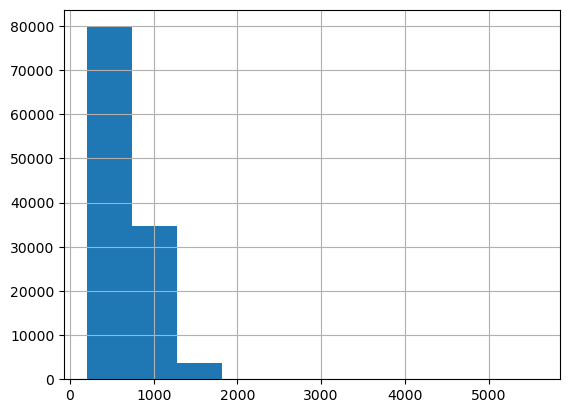

In [47]:
f1['Amount'].hist()

Importance of Identifying Outliers:<br><br>
Identifying outliers is crucial because they can indicate:<br><br>

Data entry errors: Mistakes made during data collection or entry.<br><br>
Variability: True variations in the data that may require further investigation.<br><br>
Special cases: Points of interest that might lead to new insights or hypotheses.<br><br>

In [48]:
f1['Amount'].describe()

count    118114.000000
mean        661.901247
std         268.798742
min         199.000000
25%         459.000000
50%         625.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

In [49]:
f1.shape

(118114, 18)

<Axes: >

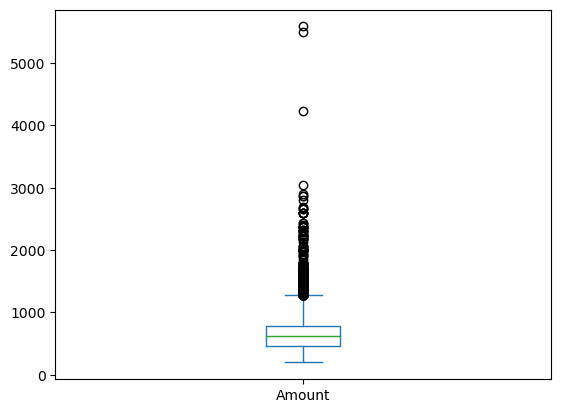

In [50]:
f1['Amount'].plot(kind= 'box')

<p style="color:cyan;">Example of the Five-Number Summary in a Box Plot:<br><br>
Minimum: The smallest value that is not considered an outlier.<br><br>
Q1 (1st quartile): The 25th percentile, where 25% of the data lies below this value.<br><br>
Median: The 50th percentile, where 50% of the data lies below this value.<br><br>
Q3 (3rd quartile): The 75th percentile, where 75% of the data lies below this value.<br><br>
Maximum: The largest value that is not considered an outlier.</p>

In [51]:
(f1['Amount'] >2000).sum()

54

In [52]:
print("The average value of the amount column is ", f1['Amount'].mean())
print("The median value of the amount column is ", f1['Amount'].median())
print("The mode value of the amount column is ", f1['Amount'].mode())
print("The variance value of the amount column is ", f1['Amount'].var())
print("The standard deviation value of the amount column is ", f1['Amount'].std())

The average value of the amount column is  661.9012469309312
The median value of the amount column is  625.0
The mode value of the amount column is  0    399.0
Name: Amount, dtype: float64
The variance value of the amount column is  72252.76364827022
The standard deviation value of the amount column is  268.79874190232033


<div style="color:cyan;">
Interpretation:<br><br>
<span style="color:red;">01.</span> The standard deviation is about 43% of the mean (281.38 / 649.04 ≈ 0.4336), which suggests a moderate to high level of variability in your data. In practical terms, the values in your dataset tend to fluctuate within a range of roughly 649.04 ± 281.38 (around 367.66 to 930.42) in most cases.<br><br>
<span style="color:red;">02.</span> A variance of 79,194.87 corresponds to this standard deviation, and the spread is substantial compared to the mean, indicating that the data points are relatively spread out, but not extreme.<br><br>
</div>
<p style="color:cyan;">Conclusion:<br><br>
The variability in your data is significant but not extremely large relative to the mean. Depending on the context, this could be acceptable or concerning. For instance, if you’re analyzing something like product prices, this spread could indicate a wide range, whereas in fields like exam scores, it might suggest inconsistency in performance.</p>

In [53]:
file = f1.copy()


In [54]:
file.to_csv('/Users/irsathazeez/Desktop/Workshop2/cleaned_Amazon_data.csv', index = False)

Now we are ready to answer the questions raised by the customer

Q1: What is the total sales amount over the past 3 months, and what are the individual sales figures for each month?
<!-- 02. Which items have been sold the most?
03. What are the most popular sizes sold for each item?
04. Which state recorded the highest sales?
05. Which month experienced the peak sales season? -->

In [55]:
total_sales = file['Amount'].sum()
print(f'Total sales = \u20B9 {total_sales:.2f}' )

Total sales = ₹ 78179803.88


In [56]:
file.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
2,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


Q2: Which items have been sold the most?

In [57]:
file.groupby('Category')['Qty'].sum().to_frame()

,Qty
Category,
Blazzer,13615
Perfume,1016
Shirt,43740
Shoes,144
Socks,377
T-shirt,44053
Trousers,9689
Wallet,810
Watch,2


In [58]:
Most_sold_product = file.groupby('Category')['Qty'].sum().idxmax()
print('Most sold product is = ', Most_sold_product)

Most sold product is =  T-shirt


Q3: What are the most popular sizes sold for each item?

In [59]:
f2 = file.groupby(['Category','Size'])['Qty','Amount'].sum().unstack()
filtered = f2.loc[['Shirt', 'T-shirt', 'Trousers', 'Blazzer']]
filtered

/var/folders/qs/xl2_48js3dj1vhc1js98m01h0000gn/T/ipykernel_1284/2882931568.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  f2 = file.groupby(['Category','Size'])['Qty','Amount'].sum().unstack()


Qty                                                            \
Size         3XL    4XL    5XL    6XL Free       L       M       S      XL   
Category                                                                     
Shirt     5020.0  343.0  449.0  603.0  NaN  7785.0  7457.0  5018.0  7602.0   
T-shirt   5152.0   43.0   56.0   69.0  NaN  7175.0  8162.0  6516.0  6658.0   
Trousers  1098.0    NaN    NaN    NaN  NaN  1600.0  1661.0  1127.0  1696.0   
Blazzer   1730.0    NaN    NaN    NaN  NaN  2469.0  2269.0  1913.0  2074.0   

                  ...     Amount                                         \
Size          XS  ...        4XL        5XL        6XL Free           L   
Category          ...                                                     
Shirt     2726.0  ...  274476.40  356703.63  480092.26  NaN  3701630.07   
T-shirt   4812.0  ...   53115.24   67689.00   89019.07  NaN  6335013.91   
Trousers   849.0  ...        NaN        NaN        NaN  NaN   895075.86   
Blazzer   1253.0  ...        NaN        NaN        NaN  NaN  2012721.40   

                                                                      
Size               M           S          XL          XS         XXL  
Category                                                              
Shirt     3517091.64  2340504.97  3601153.28  1228849.67  3194179.36  
T-shirt   7284853.89  5815424.50  5913444.97  4250807.52  4750060.85  
Trousers   939787.71   616136.62   930205.84   448516.47   880939.99  
Blazzer   1868935.49  1597304.85  1711790.99   991637.05  1563866.94  

[4 rows x 22 columns]

In [60]:
print('Most sold product of Tshirt size is = ', filtered.loc['T-shirt','Qty'].idxmax())
print('Most sold product of Shirt size is = ', filtered.loc['Shirt','Qty'].idxmax())
print('Most sold product of Trousers size is = ', filtered.loc['Trousers','Qty'].idxmax())
print('Most sold product of Blazzer size is = ', filtered.loc['Blazzer','Qty'].idxmax())

Most sold product of Tshirt size is =  M
Most sold product of Shirt size is =  L
Most sold product of Trousers size is =  XL
Most sold product of Blazzer size is =  L


Q4: Which state recorded the highest sales?

In [61]:
Hstate = file.groupby('ship-state')['Amount'].sum().to_frame().sort_values('Amount', ascending = False)
Hstate


,Amount
ship-state,
MAHARASHTRA,13261933.90
KARNATAKA,10421496.02
TELANGANA,6880035.27
UTTAR PRADESH,6798644.08
TAMIL NADU,6477109.53
...,...
Pondicherry,529.00
rajsthan,521.00
AR,493.00


In [62]:
print('Highest sales state is = ', Hstate.index[0])

Highest sales state is =  MAHARASHTRA


Q5: Which month experienced the peak sales season?

In [63]:
file.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
2,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


In [64]:
file['Date'] = pd.to_datetime(file['Date'])

In [65]:
season = file.groupby(file['Date'].dt.month)['Amount'].sum().to_frame()
season

,Amount
Date,
3,101683.85
4,28627458.79
5,26105818.34
6,23344842.90


In [66]:
print('Most sales in the month of = ', season['Amount'].idxmax())

Most sales in the month of =  4
